In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from textwrap import wrap
import time
from sklearn.svm import LinearSVC
from sklearn import svm
from glob import glob
import PIL
import re


# for data preparation and others
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# models tried
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Data Preprocessing

df = pd.read_csv("df_new.csv", delimiter=",", header = None)
X = df.iloc[1:]
X = np.asarray(X.values)
X = np.delete(X, 0, 1)
X = np.transpose(X)

y = df.iloc[0]
y = y[1:]
y = np.asarray(y)
y = np.transpose(y)

features_names = df.iloc[1:]
features_names = features_names.iloc[:,0]
features_names = np.asarray(features_names)
target_names = df.iloc[0]
target_names = target_names[1:]
target_names = np.asarray(target_names)
target_names = np.transpose(target_names)

indx = []
for i in range(len(features_names)):
  indx.append(i)
print(len(features_names))

C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

60488


In [3]:
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)


In [4]:
#normalizing or scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
#filter technique (Mutual Information [MI])
startTime = time.time()
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, copy=True, random_state=42)
endTime = time.time()
print('Time: ' + str(endTime - startTime))


Time: 178.64944624900818


In [6]:
#oraganizing MI data
gains = np.asarray(mi)
indexes = np.where(gains != 0)[0]
print(len(indexes))


45292


In [7]:
#traingin a linearSVC model with different numbers of MI features starting from the top 2 to the top 1000
#and display accuracy
#the highest accuracy corresponds to the best number of features
graph_MI = []
TotalTime = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
for i in range (2,1000):
  
  it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-i:]

  startTime = time.time()

  x_train = X_train[:, it]
  x_test = X_test[:, it]
  Y_train = y_train[:]
  Y_test = y_test[:]
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  clf = LinearSVC(random_state=42)
  clf.fit(x_train, Y_train)
  scores = clf.score(x_test, Y_test)
  endTime = time.time()
  y_pred = clf.predict(x_test)
  print(i)
  print('Score: ' + str(scores))
  print(accuracy_score(Y_test, y_pred))
  print('Time: ' + str(endTime - startTime))
  graph_MI.append(scores)
EndTime = time.time()
print('TotalTime: ' + str(EndTime - TotalTime))

2
Score: 0.9454545454545454
0.9454545454545454
Time: 0.002003908157348633
3
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0009975433349609375
4
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0020020008087158203
5
Score: 0.9681818181818181
0.9681818181818181
Time: 0.00099945068359375
6
Score: 0.9636363636363636
0.9636363636363636
Time: 0.002000093460083008
7
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0030002593994140625
8
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0020012855529785156
9
Score: 0.9636363636363636
0.9636363636363636
Time: 0.002971172332763672
10
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003002643585205078
11
Score: 0.9590909090909091
0.9590909090909091
Time: 0.003999948501586914
12
Score: 0.9772727272727273
0.9772727272727273
Time: 0.0029993057250976562
13
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0020325183868408203
14
Score: 0.9681818181818181
0.9681818181818181
Time: 0.002000093460083008
15
Score: 0.9681818181818181

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


16
Score: 0.9681818181818181
0.9681818181818181
Time: 0.008958101272583008
17
Score: 0.9727272727272728
0.9727272727272728
Time: 0.003000974655151367
18
Score: 0.9727272727272728
0.9727272727272728
Time: 0.0029990673065185547
19
Score: 0.9863636363636363
0.9863636363636363
Time: 0.003997087478637695
20
Score: 0.9863636363636363
0.9863636363636363
Time: 0.0029993057250976562
21
Score: 0.9727272727272728
0.9727272727272728
Time: 0.0029993057250976562
22
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0030012130737304688


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

23
Score: 0.9681818181818181
0.9681818181818181
Time: 0.002998828887939453
24
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003000974655151367
25
Score: 0.9681818181818181
0.9681818181818181
Time: 0.004001140594482422
26
Score: 0.9772727272727273
0.9772727272727273
Time: 0.005002737045288086
27
Score: 0.9863636363636363
0.9863636363636363
Time: 0.0029981136322021484


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


28
Score: 0.9727272727272728
0.9727272727272728
Time: 0.0029985904693603516
29
Score: 0.9727272727272728
0.9727272727272728
Time: 0.0040013790130615234
30
Score: 0.9681818181818181
0.9681818181818181
Time: 0.004000186920166016
31
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999471664428711
32
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999233245849609
33
Score: 0.9681818181818181
0.9681818181818181
Time: 0.004000186920166016
34
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003000497817993164


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


35
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0029985904693603516
36
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0040130615234375
37
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003998517990112305
38
Score: 0.9681818181818181
0.9681818181818181
Time: 0.005001068115234375
39
Score: 0.9681818181818181
0.9681818181818181
Time: 0.006000518798828125
40
Score: 0.9681818181818181
0.9681818181818181
Time: 0.00600123405456543


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


41
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0050013065338134766
42
Score: 0.9772727272727273
0.9772727272727273
Time: 0.005000591278076172
43
Score: 0.9772727272727273
0.9772727272727273
Time: 0.0050013065338134766
44
Score: 0.9772727272727273
0.9772727272727273
Time: 0.0039980411529541016
45
Score: 0.9772727272727273
0.9772727272727273
Time: 0.006001472473144531
46
Score: 0.9772727272727273


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9772727272727273
Time: 0.006000041961669922
47
Score: 0.9772727272727273
0.9772727272727273
Time: 0.0060002803802490234
48
Score: 0.9727272727272728
0.9727272727272728
Time: 0.0029993057250976562
49
Score: 0.9681818181818181
0.9681818181818181
Time: 0.002998828887939453
50
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0029997825622558594
51
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999948501586914
52
Score: 0.9681818181818181
0.9681818181818181
Time: 0.002998828887939453
53
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0039997100830078125
54
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999233245849609
55
Score: 0.9681818181818181
0.9681818181818181
Time: 0.00400090217590332
56
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999948501586914
57
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0050199031829833984
58
Score: 0.9681818181818181
0.9681818181818181
Time: 0.003999471664428711
59
Score: 0.9681818181818181
0.9681818181818181
Ti

158
Score: 0.9681818181818181
0.9681818181818181
Time: 0.015000104904174805
159
Score: 0.9681818181818181
0.9681818181818181
Time: 0.010998964309692383
160
Score: 0.9681818181818181
0.9681818181818181
Time: 0.01399683952331543
161
Score: 0.9681818181818181
0.9681818181818181
Time: 0.0110015869140625
162
Score: 0.9681818181818181
0.9681818181818181
Time: 0.012998580932617188
163
Score: 0.9681818181818181
0.9681818181818181
Time: 0.015001058578491211
164
Score: 0.9681818181818181
0.9681818181818181
Time: 0.01200103759765625
165
Score: 0.9636363636363636
0.9636363636363636
Time: 0.012001514434814453
166
Score: 0.9681818181818181
0.9681818181818181
Time: 0.01500082015991211
167
Score: 0.9681818181818181
0.9681818181818181
Time: 0.013998746871948242
168
Score: 0.9681818181818181
0.9681818181818181
Time: 0.013998031616210938
169
Score: 0.9636363636363636
0.9636363636363636
Time: 0.012999534606933594
170
Score: 0.9636363636363636
0.9636363636363636
Time: 0.012999534606933594
171
Score: 0.9636

268
Score: 0.9727272727272728
0.9727272727272728
Time: 0.028998613357543945
269
Score: 0.9681818181818181
0.9681818181818181
Time: 0.02702951431274414
270
Score: 0.9681818181818181
0.9681818181818181
Time: 0.028000593185424805
271
Score: 0.9681818181818181
0.9681818181818181
Time: 0.02700042724609375
272
Score: 0.9681818181818181
0.9681818181818181
Time: 0.034002065658569336
273
Score: 0.9636363636363636
0.9636363636363636
Time: 0.026999950408935547
274
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04199981689453125
275
Score: 0.9681818181818181
0.9681818181818181
Time: 0.03699970245361328
276
Score: 0.9681818181818181
0.9681818181818181
Time: 0.03400230407714844
277
Score: 0.9636363636363636
0.9636363636363636
Time: 0.02900099754333496
278
Score: 0.9636363636363636
0.9636363636363636
Time: 0.023999691009521484
279
Score: 0.9636363636363636
0.9636363636363636
Time: 0.02599930763244629
280
Score: 0.9636363636363636
0.9636363636363636
Time: 0.023000717163085938
281
Score: 0.968181

379
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03499913215637207
380
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04199981689453125
381
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03400087356567383
382
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03500223159790039
383
Score: 0.9636363636363636
0.9636363636363636
Time: 0.032999515533447266
384
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04100203514099121
385
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03500103950500488
386
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03499960899353027
387
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03600049018859863
388
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03599953651428223
389
Score: 0.9636363636363636
0.9636363636363636
Time: 0.031999826431274414
390
Score: 0.9636363636363636
0.9636363636363636
Time: 0.031999826431274414
391
Score: 0.9636363636363636
0.9636363636363636
Time: 0.03199887275695801
392
Score: 0.963636363

489
Score: 0.9636363636363636
0.9636363636363636
Time: 0.044002532958984375
490
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04200172424316406
491
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04300045967102051
492
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0429997444152832
493
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05099964141845703
494
Score: 0.9636363636363636
0.9636363636363636
Time: 0.06399679183959961
495
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05399680137634277
496
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04900193214416504
497
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05299949645996094
498
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0540006160736084
499
Score: 0.9681818181818181
0.9681818181818181
Time: 0.05399918556213379
500
Score: 0.9681818181818181
0.9681818181818181
Time: 0.05399942398071289
501
Score: 0.9681818181818181
0.9681818181818181
Time: 0.054999351501464844
502
Score: 0.968181818181

600
Score: 0.9590909090909091
0.9590909090909091
Time: 0.0690004825592041
601
Score: 0.9636363636363636
0.9636363636363636
Time: 0.051000356674194336
602
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05200076103210449
603
Score: 0.9636363636363636
0.9636363636363636
Time: 0.07400107383728027
604
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05100083351135254
605
Score: 0.9636363636363636
0.9636363636363636
Time: 0.050000905990600586
606
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05299997329711914
607
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05199885368347168
608
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04899954795837402
609
Score: 0.9636363636363636
0.9636363636363636
Time: 0.05099940299987793
610
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04999947547912598
611
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0690009593963623
612
Score: 0.9636363636363636
0.9636363636363636
Time: 0.04900074005126953
613
Score: 0.963636363636

710
Score: 0.9545454545454546
0.9545454545454546
Time: 0.05999946594238281
711
Score: 0.9545454545454546
0.9545454545454546
Time: 0.0670011043548584
712
Score: 0.9545454545454546
0.9545454545454546
Time: 0.059000253677368164
713
Score: 0.9545454545454546
0.9545454545454546
Time: 0.06000089645385742
714
Score: 0.9545454545454546
0.9545454545454546
Time: 0.05700063705444336
715
Score: 0.9545454545454546
0.9545454545454546
Time: 0.06000065803527832
716
Score: 0.9545454545454546
0.9545454545454546
Time: 0.06403493881225586
717
Score: 0.9545454545454546
0.9545454545454546
Time: 0.05696415901184082
718
Score: 0.9545454545454546
0.9545454545454546
Time: 0.0599973201751709
719
Score: 0.9545454545454546
0.9545454545454546
Time: 0.0670008659362793
720
Score: 0.9545454545454546
0.9545454545454546
Time: 0.06199955940246582
721
Score: 0.9545454545454546
0.9545454545454546
Time: 0.0729990005493164
722
Score: 0.9545454545454546
0.9545454545454546
Time: 0.07100319862365723
723
Score: 0.954545454545454

825
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0729973316192627
826
Score: 0.9636363636363636
0.9636363636363636
Time: 0.0619661808013916
827
Score: 0.9590909090909091
0.9590909090909091
Time: 0.0689992904663086
828
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06200003623962402
829
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06600236892700195
830
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06299948692321777
831
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06300139427185059
832
Score: 0.9590909090909091
0.9590909090909091
Time: 0.08800005912780762
833
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06299996376037598
834
Score: 0.9590909090909091
0.9590909090909091
Time: 0.0760030746459961
835
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06999993324279785
836
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06600189208984375
837
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06199979782104492
838
Score: 0.9590909090909091

935
Score: 0.9590909090909091
0.9590909090909091
Time: 0.08100104331970215
936
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07599973678588867
937
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07400059700012207
938
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07300329208374023
939
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07100272178649902
940
Score: 0.9590909090909091
0.9590909090909091
Time: 0.06999874114990234
941
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07200002670288086
942
Score: 0.9590909090909091
0.9590909090909091
Time: 0.08500266075134277
943
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07200121879577637
944
Score: 0.9590909090909091
0.9590909090909091
Time: 0.0710000991821289
945
Score: 0.9590909090909091
0.9590909090909091
Time: 0.07300209999084473
946
Score: 0.9636363636363636
0.9636363636363636
Time: 0.07800030708312988
947
Score: 0.9636363636363636
0.9636363636363636
Time: 0.08600115776062012
948
Score: 0.9636363636363

Text(0, 0.5, 'Accuracy')

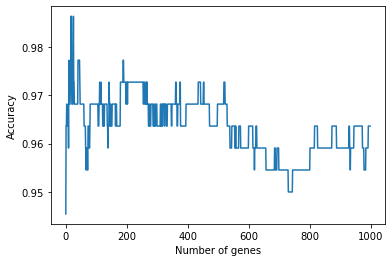

In [8]:
#Plot a graph with all accuracy scores
plt.plot(graph_MI)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')


In [9]:
#Display the best number of features
graph_MI = np.asarray(graph_MI)
print(np.argmax(graph_MI))
print(graph_MI[np.argmax(graph_MI)]) 
print(np.where(graph_MI == graph_MI[np.argmax(graph_MI)]))

#Since the counting started from 2 in the for loop, 2 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 19 not 17

17
0.9863636363636363
(array([17, 18, 25], dtype=int64),)


In [10]:
graph_MI[17]
#the higest accuracy is with 19 features because the list starts from 2

0.9863636363636363

In [15]:
#Confusion matrix (19 features of MI) *******
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-19:]
startTime = time.time()
x_train = X_train[:, it]
x_test = X_test[:, it]
Y_train = y_train[:]
Y_test = y_test[:]
x_train = x_train.astype('float32')
X_test = x_test.astype('float32')
Y_train = Y_train[:]
Y_test = Y_test[:]
clf = LinearSVC(random_state=42)

clf.fit(x_train, Y_train)
scores = clf.score(x_test, Y_test)
endTime = time.time()
print('Score: ' + str(scores))
print('Time: ' + str(endTime - startTime))
y_pred = clf.predict(x_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(y_test, y_pred))




Score: 0.9863636363636363
Time: 0.0110015869140625
[[198   0]
 [  3  19]]
                     precision    recall  f1-score   support

      Primary Tumor       0.99      1.00      0.99       198
Solid Tissue Normal       1.00      0.86      0.93        22

           accuracy                           0.99       220
          macro avg       0.99      0.93      0.96       220
       weighted avg       0.99      0.99      0.99       220

0.9863636363636363


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
#trying the LinearSVC model in case of all MI features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
it = sorted(range(len(indexes)), key = lambda sub: gains[sub])[:]

startTime = time.time()

x_train = X_train[:, it]
x_test = X_test[:, it]
Y_train = y_train[:]
Y_test = y_test[:]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
clf = LinearSVC(random_state=42)
clf.fit(x_train, Y_train)
scores = clf.score(x_test, Y_test)
endTime = time.time()
y_pred = clf.predict(x_test)
print('Score: ' + str(scores))
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('Time: ' + str(endTime - startTime))


Score: 0.9272727272727272
0.9272727272727272
[[182  16]
 [  0  22]]
                     precision    recall  f1-score   support

      Primary Tumor       1.00      0.92      0.96       198
Solid Tissue Normal       0.58      1.00      0.73        22

           accuracy                           0.93       220
          macro avg       0.79      0.96      0.85       220
       weighted avg       0.96      0.93      0.94       220

0.9272727272727272
Time: 2.8579962253570557


In [12]:
#Wrapper Technique (Random Forest [RF])
#making a for loop to find the best number of estimators (trees) based on accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scores = []
start_time = time.time()
for i in range (1, 1000):
  ST = time.time()
  regressor = RandomForestClassifier(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  sorted_features = sorted (zip(map(lambda x: round(x, 4), regressor.feature_importances_), indx),reverse=True)
  important_f = []
  

  for s in sorted_features:
    if s[0] != 0:
      important_f.append(s[1])
  important_f = np.transpose(important_f)
  important_f = np.asarray(important_f)
    
    
  #checking the similarities in the first 19 features in MI with features used in RF (n_estimators = i)
  it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-19:]
  similarity = []
  count = 0
  for f in important_f:
    for t in it:
      if (f == t):
        count = count + 1
        similarity.append(f)

  print("number of estimators: ", i)
  print(accuracy_score(y_test, y_pred))
  scores.append(accuracy_score(y_test, y_pred))

  print("the number of important features used: ", len(important_f))
  print ("number of similar features: ", len(similarity))  
  ET = time.time()
  print("time: ", ET - ST)
  print("\n")
endTime = time.time()
print("Total Time: ", str(endTime - start_time))

number of estimators:  1
0.9772727272727273
the number of important features used:  5
number of similar features:  0
time:  0.37596988677978516


number of estimators:  2
0.9636363636363636
the number of important features used:  7
number of similar features:  0
time:  0.3989980220794678


number of estimators:  3
0.9772727272727273
the number of important features used:  12
number of similar features:  0
time:  0.3610215187072754


number of estimators:  4
0.9727272727272728
the number of important features used:  17
number of similar features:  0
time:  0.386979341506958


number of estimators:  5
0.9818181818181818
the number of important features used:  19
number of similar features:  1
time:  0.3879995346069336


number of estimators:  6
0.9636363636363636
the number of important features used:  23
number of similar features:  2
time:  0.39299988746643066


number of estimators:  7
0.9772727272727273
the number of important features used:  27
number of similar features:  2
time:  

number of estimators:  57
0.9772727272727273
the number of important features used:  265
number of similar features:  8
time:  0.7589995861053467


number of estimators:  58
0.9772727272727273
the number of important features used:  269
number of similar features:  8
time:  0.7729990482330322


number of estimators:  59
0.9772727272727273
the number of important features used:  273
number of similar features:  8
time:  0.78299880027771


number of estimators:  60
0.9772727272727273
the number of important features used:  276
number of similar features:  9
time:  0.775031566619873


number of estimators:  61
0.9818181818181818
the number of important features used:  280
number of similar features:  9
time:  0.7760007381439209


number of estimators:  62
0.9772727272727273
the number of important features used:  285
number of similar features:  9
time:  0.795853853225708


number of estimators:  63
0.9818181818181818
the number of important features used:  290
number of similar features:

number of estimators:  113
0.9772727272727273
the number of important features used:  497
number of similar features:  11
time:  1.1450319290161133


number of estimators:  114
0.9772727272727273
the number of important features used:  501
number of similar features:  11
time:  1.2379717826843262


number of estimators:  115
0.9772727272727273
the number of important features used:  502
number of similar features:  11
time:  1.1810276508331299


number of estimators:  116
0.9727272727272728
the number of important features used:  505
number of similar features:  11
time:  1.1779677867889404


number of estimators:  117
0.9727272727272728
the number of important features used:  509
number of similar features:  11
time:  1.18300199508667


number of estimators:  118
0.9727272727272728
the number of important features used:  512
number of similar features:  11
time:  1.1560304164886475


number of estimators:  119
0.9727272727272728
the number of important features used:  515
number of si

number of estimators:  168
0.9727272727272728
the number of important features used:  703
number of similar features:  12
time:  1.5850107669830322


number of estimators:  169
0.9727272727272728
the number of important features used:  707
number of similar features:  12
time:  1.6200504302978516


number of estimators:  170
0.9727272727272728
the number of important features used:  709
number of similar features:  12
time:  1.6050004959106445


number of estimators:  171
0.9727272727272728
the number of important features used:  714
number of similar features:  12
time:  1.6220033168792725


number of estimators:  172
0.9727272727272728
the number of important features used:  718
number of similar features:  12
time:  1.6140272617340088


number of estimators:  173
0.9727272727272728
the number of important features used:  719
number of similar features:  12
time:  1.7329919338226318


number of estimators:  174
0.9727272727272728
the number of important features used:  724
number of 

number of estimators:  223
0.9772727272727273
the number of important features used:  883
number of similar features:  14
time:  2.061997890472412


number of estimators:  224
0.9772727272727273
the number of important features used:  887
number of similar features:  14
time:  1.9180748462677002


number of estimators:  225
0.9772727272727273
the number of important features used:  892
number of similar features:  14
time:  1.9780359268188477


number of estimators:  226
0.9772727272727273
the number of important features used:  894
number of similar features:  14
time:  2.0769670009613037


number of estimators:  227
0.9772727272727273
the number of important features used:  899
number of similar features:  14
time:  1.9441523551940918


number of estimators:  228
0.9772727272727273
the number of important features used:  901
number of similar features:  14
time:  1.9200007915496826


number of estimators:  229
0.9772727272727273
the number of important features used:  904
number of s

number of estimators:  278
0.9772727272727273
the number of important features used:  1066
number of similar features:  16
time:  2.417971134185791


number of estimators:  279
0.9772727272727273
the number of important features used:  1067
number of similar features:  16
time:  2.473999261856079


number of estimators:  280
0.9772727272727273
the number of important features used:  1069
number of similar features:  16
time:  2.5348222255706787


number of estimators:  281
0.9772727272727273
the number of important features used:  1073
number of similar features:  16
time:  2.4769961833953857


number of estimators:  282
0.9772727272727273
the number of important features used:  1075
number of similar features:  16
time:  2.7002720832824707


number of estimators:  283
0.9772727272727273
the number of important features used:  1076
number of similar features:  16
time:  2.590153455734253


number of estimators:  284
0.9772727272727273
the number of important features used:  1079
number

number of estimators:  333
0.9772727272727273
the number of important features used:  1232
number of similar features:  18
time:  2.9960012435913086


number of estimators:  334
0.9772727272727273
the number of important features used:  1240
number of similar features:  18
time:  2.966010808944702


number of estimators:  335
0.9772727272727273
the number of important features used:  1241
number of similar features:  18
time:  2.7610011100769043


number of estimators:  336
0.9772727272727273
the number of important features used:  1243
number of similar features:  18
time:  2.7320334911346436


number of estimators:  337
0.9772727272727273
the number of important features used:  1241
number of similar features:  18
time:  2.87054181098938


number of estimators:  338
0.9772727272727273
the number of important features used:  1241
number of similar features:  18
time:  2.951004981994629


number of estimators:  339
0.9818181818181818
the number of important features used:  1244
number 

number of estimators:  388
0.9818181818181818
the number of important features used:  1353
number of similar features:  18
time:  3.129002332687378


number of estimators:  389
0.9863636363636363
the number of important features used:  1358
number of similar features:  18
time:  3.1249983310699463


number of estimators:  390
0.9863636363636363
the number of important features used:  1360
number of similar features:  18
time:  3.1890807151794434


number of estimators:  391
0.9863636363636363
the number of important features used:  1360
number of similar features:  18
time:  3.046999931335449


number of estimators:  392
0.9818181818181818
the number of important features used:  1364
number of similar features:  18
time:  3.1420388221740723


number of estimators:  393
0.9863636363636363
the number of important features used:  1368
number of similar features:  18
time:  3.1399624347686768


number of estimators:  394
0.9863636363636363
the number of important features used:  1371
numbe

number of estimators:  443
0.9863636363636363
the number of important features used:  1472
number of similar features:  18
time:  3.5770347118377686


number of estimators:  444
0.9863636363636363
the number of important features used:  1476
number of similar features:  18
time:  3.6289660930633545


number of estimators:  445
0.9863636363636363
the number of important features used:  1480
number of similar features:  18
time:  3.631999969482422


number of estimators:  446
0.9863636363636363
the number of important features used:  1481
number of similar features:  18
time:  3.7630038261413574


number of estimators:  447
0.9863636363636363
the number of important features used:  1482
number of similar features:  18
time:  3.7000021934509277


number of estimators:  448
0.9863636363636363
the number of important features used:  1485
number of similar features:  18
time:  3.706998348236084


number of estimators:  449
0.9863636363636363
the number of important features used:  1486
numbe

number of estimators:  498
0.9818181818181818
the number of important features used:  1571
number of similar features:  18
time:  3.8810553550720215


number of estimators:  499
0.9863636363636363
the number of important features used:  1572
number of similar features:  18
time:  3.9759583473205566


number of estimators:  500
0.9818181818181818
the number of important features used:  1571
number of similar features:  18
time:  4.004998207092285


number of estimators:  501
0.9863636363636363
the number of important features used:  1571
number of similar features:  18
time:  4.028392791748047


number of estimators:  502
0.9818181818181818
the number of important features used:  1577
number of similar features:  18
time:  4.033998250961304


number of estimators:  503
0.9818181818181818
the number of important features used:  1580
number of similar features:  19
time:  4.007953405380249


number of estimators:  504
0.9818181818181818
the number of important features used:  1581
number 

number of estimators:  553
0.9818181818181818
the number of important features used:  1644
number of similar features:  19
time:  4.494002103805542


number of estimators:  554
0.9818181818181818
the number of important features used:  1642
number of similar features:  19
time:  4.5502028465271


number of estimators:  555
0.9818181818181818
the number of important features used:  1643
number of similar features:  19
time:  4.511716604232788


number of estimators:  556
0.9818181818181818
the number of important features used:  1645
number of similar features:  19
time:  4.5700013637542725


number of estimators:  557
0.9818181818181818
the number of important features used:  1644
number of similar features:  19
time:  4.555999517440796


number of estimators:  558
0.9818181818181818
the number of important features used:  1647
number of similar features:  19
time:  4.634843349456787


number of estimators:  559
0.9818181818181818
the number of important features used:  1651
number of 

number of estimators:  608
0.9818181818181818
the number of important features used:  1675
number of similar features:  19
time:  4.900305271148682


number of estimators:  609
0.9818181818181818
the number of important features used:  1674
number of similar features:  19
time:  4.961968898773193


number of estimators:  610
0.9818181818181818
the number of important features used:  1676
number of similar features:  19
time:  4.911077976226807


number of estimators:  611
0.9818181818181818
the number of important features used:  1675
number of similar features:  19
time:  4.985787868499756


number of estimators:  612
0.9818181818181818
the number of important features used:  1675
number of similar features:  19
time:  4.923318386077881


number of estimators:  613
0.9818181818181818
the number of important features used:  1676
number of similar features:  19
time:  4.972998857498169


number of estimators:  614
0.9818181818181818
the number of important features used:  1678
number of

number of estimators:  663
0.9863636363636363
the number of important features used:  1707
number of similar features:  19
time:  5.37677788734436


number of estimators:  664
0.9863636363636363
the number of important features used:  1708
number of similar features:  19
time:  5.41700005531311


number of estimators:  665
0.9863636363636363
the number of important features used:  1708
number of similar features:  19
time:  5.321172475814819


number of estimators:  666
0.9863636363636363
the number of important features used:  1710
number of similar features:  19
time:  5.3889970779418945


number of estimators:  667
0.9863636363636363
the number of important features used:  1709
number of similar features:  19
time:  5.37680196762085


number of estimators:  668
0.9863636363636363
the number of important features used:  1711
number of similar features:  19
time:  5.36211633682251


number of estimators:  669
0.9863636363636363
the number of important features used:  1711
number of si

number of estimators:  718
0.9863636363636363
the number of important features used:  1726
number of similar features:  19
time:  5.729037523269653


number of estimators:  719
0.9863636363636363
the number of important features used:  1727
number of similar features:  19
time:  5.819086074829102


number of estimators:  720
0.9863636363636363
the number of important features used:  1727
number of similar features:  19
time:  6.27044415473938


number of estimators:  721
0.9863636363636363
the number of important features used:  1724
number of similar features:  19
time:  5.8359856605529785


number of estimators:  722
0.9863636363636363
the number of important features used:  1726
number of similar features:  19
time:  5.890243053436279


number of estimators:  723
0.9863636363636363
the number of important features used:  1727
number of similar features:  19
time:  6.215792894363403


number of estimators:  724
0.9863636363636363
the number of important features used:  1727
number of

number of estimators:  773
0.9863636363636363
the number of important features used:  1749
number of similar features:  19
time:  6.166998624801636


number of estimators:  774
0.9863636363636363
the number of important features used:  1750
number of similar features:  19
time:  6.16900110244751


number of estimators:  775
0.9863636363636363
the number of important features used:  1751
number of similar features:  19
time:  6.200816869735718


number of estimators:  776
0.9863636363636363
the number of important features used:  1752
number of similar features:  19
time:  6.10203218460083


number of estimators:  777
0.9863636363636363
the number of important features used:  1752
number of similar features:  19
time:  6.235166788101196


number of estimators:  778
0.9863636363636363
the number of important features used:  1753
number of similar features:  19
time:  6.1829917430877686


number of estimators:  779
0.9863636363636363
the number of important features used:  1747
number of 

number of estimators:  828
0.9863636363636363
the number of important features used:  1804
number of similar features:  19
time:  6.560996055603027


number of estimators:  829
0.9863636363636363
the number of important features used:  1806
number of similar features:  19
time:  6.565000534057617


number of estimators:  830
0.9863636363636363
the number of important features used:  1806
number of similar features:  19
time:  6.6145641803741455


number of estimators:  831
0.9863636363636363
the number of important features used:  1805
number of similar features:  19
time:  6.593037128448486


number of estimators:  832
0.9863636363636363
the number of important features used:  1804
number of similar features:  19
time:  6.594271898269653


number of estimators:  833
0.9863636363636363
the number of important features used:  1805
number of similar features:  19
time:  6.608011484146118


number of estimators:  834
0.9863636363636363
the number of important features used:  1805
number o

number of estimators:  883
0.9863636363636363
the number of important features used:  1863
number of similar features:  19
time:  6.7809975147247314


number of estimators:  884
0.9863636363636363
the number of important features used:  1864
number of similar features:  19
time:  6.887968301773071


number of estimators:  885
0.9863636363636363
the number of important features used:  1865
number of similar features:  19
time:  6.812130928039551


number of estimators:  886
0.9863636363636363
the number of important features used:  1866
number of similar features:  19
time:  6.864902019500732


number of estimators:  887
0.9863636363636363
the number of important features used:  1868
number of similar features:  19
time:  6.81700873374939


number of estimators:  888
0.9863636363636363
the number of important features used:  1868
number of similar features:  19
time:  6.816877126693726


number of estimators:  889
0.9863636363636363
the number of important features used:  1869
number of

number of estimators:  938
0.9863636363636363
the number of important features used:  1912
number of similar features:  19
time:  7.367526054382324


number of estimators:  939
0.9863636363636363
the number of important features used:  1914
number of similar features:  19
time:  7.475779056549072


number of estimators:  940
0.9863636363636363
the number of important features used:  1915
number of similar features:  19
time:  7.446043252944946


number of estimators:  941
0.9863636363636363
the number of important features used:  1916
number of similar features:  19
time:  7.490031957626343


number of estimators:  942
0.9863636363636363
the number of important features used:  1919
number of similar features:  19
time:  7.565767288208008


number of estimators:  943
0.9863636363636363
the number of important features used:  1920
number of similar features:  19
time:  7.512997150421143


number of estimators:  944
0.9863636363636363
the number of important features used:  1922
number of

number of estimators:  993
0.9863636363636363
the number of important features used:  1961
number of similar features:  19
time:  7.824963569641113


number of estimators:  994
0.9863636363636363
the number of important features used:  1962
number of similar features:  19
time:  7.9542787075042725


number of estimators:  995
0.9863636363636363
the number of important features used:  1962
number of similar features:  19
time:  7.867009162902832


number of estimators:  996
0.9863636363636363
the number of important features used:  1964
number of similar features:  19
time:  7.938157081604004


number of estimators:  997
0.9863636363636363
the number of important features used:  1964
number of similar features:  19
time:  8.051000595092773


number of estimators:  998
0.9863636363636363
the number of important features used:  1963
number of similar features:  19
time:  7.91396951675415


number of estimators:  999
0.9863636363636363
the number of important features used:  1962
number of

Text(0, 0.5, 'Accuracy')

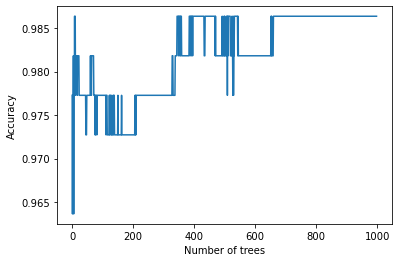

In [13]:
#Plot a graph with all accuracy scores
plt.plot(scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')


In [14]:
#Display the best number of features
scores = np.asarray(scores)
print(np.argmax(scores))
print(scores[np.argmax(scores)]) 
print(np.where(scores == scores[np.argmax(scores)]))

#Since the counting started from 1 not zero in the for loop, 1 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 9 not 8

8
0.9863636363636363
(array([  8,  10, 344, 345, 346, 347, 348, 350, 351, 352, 354, 356, 357,
       358, 384, 385, 386, 388, 389, 390, 392, 393, 394, 396, 397, 398,
       399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
       412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 430, 431, 432, 436, 437, 438, 439, 440,
       441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453,
       454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466,
       467, 468, 470, 492, 498, 500, 506, 507, 508, 510, 512, 513, 514,
       515, 516, 517, 518, 524, 528, 532, 533, 534, 535, 536, 537, 538,
       539, 540, 541, 542, 544, 652, 654, 660, 661, 662, 663, 664, 665,
       666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678,
       679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691,
       692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
       705, 706, 707, 708, 709, 710, 711, 

In [16]:
#to get the common features between top 19 MI features and the features of the 345 trees in the Random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
ST = time.time()
regressor = RandomForestClassifier(n_estimators=345, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
sorted_features = sorted (zip(map(lambda x: round(x, 4), regressor.feature_importances_), indx),reverse=True)
important_f = []
  

for s in sorted_features:
  if s[0] != 0:
    important_f.append(s[1])
important_f = np.transpose(important_f)
important_f = np.asarray(important_f)

#checking the similarities in the first 19 features in MI with features used in RF (n_estimators = 345)
it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-19:]
similarity = []
count = 0
for f in important_f:
  for t in it:
    if (f == t):
      count = count + 1
      similarity.append(f)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("the number of important features used: ", len(important_f))
print ("number of similar features: ", len(similarity))  
ET = time.time()
print("time: ", ET - ST)
print("\n")


0.9863636363636363
[[198   0]
 [  3  19]]
                     precision    recall  f1-score   support

      Primary Tumor       0.99      1.00      0.99       198
Solid Tissue Normal       1.00      0.86      0.93        22

           accuracy                           0.99       220
          macro avg       0.99      0.93      0.96       220
       weighted avg       0.99      0.99      0.99       220

the number of important features used:  1261
number of similar features:  18
time:  2.9190008640289307




In [17]:
#The wrapper technique (Recursive Feature Elimination [RFE])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Total_time = time.time()
graph_RFE = []
for i in range(1, 1000):
  startTime = time.time()
  estimator = LinearSVC(random_state=42)
  selector = RFE(estimator, n_features_to_select= i, step=0.5)
  selector = selector.fit(X_train, y_train)
  endTime = time.time()
  print('Time: ' + str(endTime - startTime))
  # testing the model
  y_pred = selector.predict(X_test)
  print(accuracy_score(y_test,y_pred))
  print(selector.score(X_test, y_test))
  print(np.count_nonzero(selector.support_ == 1))
  graph_RFE.append(selector.score(X_test, y_test))
EndTime = time.time()
print('TotalTime: ' + str(EndTime - Total_time))


(329, 60488)
(329,)
(220, 60488)
(220,)
Time: 4.0139992237091064
0.9
0.9
1
Time: 4.686246871948242
0.9
0.9
2
Time: 4.22103214263916
0.9
0.9
3
Time: 4.299020767211914
0.9181818181818182
0.9181818181818182
4
Time: 4.115001440048218
0.9590909090909091
0.9590909090909091
5
Time: 4.152119159698486
0.9590909090909091
0.9590909090909091
6
Time: 4.308403730392456
0.9590909090909091
0.9590909090909091
7
Time: 4.322996139526367
0.95
0.95
8
Time: 4.114771604537964
0.9590909090909091
0.9590909090909091
9
Time: 4.042214393615723
0.9590909090909091
0.9590909090909091
10
Time: 4.27799654006958
0.9545454545454546
0.9545454545454546
11
Time: 4.4509968757629395
0.9545454545454546
0.9545454545454546
12
Time: 4.271867275238037
0.9545454545454546
0.9545454545454546
13
Time: 4.0499961376190186
0.9636363636363636
0.9636363636363636
14
Time: 4.077009916305542
0.9636363636363636
0.9636363636363636
15
Time: 4.051021337509155
0.9636363636363636
0.9636363636363636
16
Time: 4.101968765258789
0.9636363636363636
0.9

Time: 4.007622480392456
0.9727272727272728
0.9727272727272728
131
Time: 4.07503604888916
0.9636363636363636
0.9636363636363636
132
Time: 4.044038534164429
0.9636363636363636
0.9636363636363636
133
Time: 4.0751659870147705
0.9681818181818181
0.9681818181818181
134
Time: 4.044677257537842
0.9681818181818181
0.9681818181818181
135
Time: 4.018032789230347
0.9681818181818181
0.9681818181818181
136
Time: 4.05306077003479
0.9681818181818181
0.9681818181818181
137
Time: 4.095036745071411
0.9681818181818181
0.9681818181818181
138
Time: 4.030036926269531
0.9681818181818181
0.9681818181818181
139
Time: 4.054034948348999
0.9681818181818181
0.9681818181818181
140
Time: 4.0601677894592285
0.9681818181818181
0.9681818181818181
141
Time: 4.065922737121582
0.9681818181818181
0.9681818181818181
142
Time: 4.023003816604614
0.9636363636363636
0.9636363636363636
143
Time: 4.079003095626831
0.9636363636363636
0.9636363636363636
144
Time: 4.094313144683838
0.9636363636363636
0.9636363636363636
145
Time: 4.08

Time: 4.0200355052948
0.9681818181818181
0.9681818181818181
255
Time: 4.087906360626221
0.9681818181818181
0.9681818181818181
256
Time: 4.0899977684021
0.9681818181818181
0.9681818181818181
257
Time: 4.174998760223389
0.9681818181818181
0.9681818181818181
258
Time: 4.019071340560913
0.9681818181818181
0.9681818181818181
259
Time: 4.013000249862671
0.9681818181818181
0.9681818181818181
260
Time: 4.045001745223999
0.9681818181818181
0.9681818181818181
261
Time: 4.124844789505005
0.9681818181818181
0.9681818181818181
262
Time: 4.0520102977752686
0.9681818181818181
0.9681818181818181
263
Time: 4.039018630981445
0.9681818181818181
0.9681818181818181
264
Time: 4.078997611999512
0.9681818181818181
0.9681818181818181
265
Time: 4.092109680175781
0.9727272727272728
0.9727272727272728
266
Time: 4.069994688034058
0.9727272727272728
0.9727272727272728
267
Time: 4.053998708724976
0.9727272727272728
0.9727272727272728
268
Time: 4.046134948730469
0.9636363636363636
0.9636363636363636
269
Time: 4.08303

Time: 4.067035913467407
0.9636363636363636
0.9636363636363636
384
Time: 4.039999723434448
0.9636363636363636
0.9636363636363636
385
Time: 4.093085289001465
0.9636363636363636
0.9636363636363636
386
Time: 4.0219972133636475
0.9590909090909091
0.9590909090909091
387
Time: 4.062077760696411
0.9681818181818181
0.9681818181818181
388
Time: 4.051034450531006
0.9590909090909091
0.9590909090909091
389
Time: 4.11447286605835
0.9590909090909091
0.9590909090909091
390
Time: 4.04200005531311
0.9590909090909091
0.9590909090909091
391
Time: 4.04003643989563
0.9636363636363636
0.9636363636363636
392
Time: 4.0399839878082275
0.9590909090909091
0.9590909090909091
393
Time: 4.225814342498779
0.9590909090909091
0.9590909090909091
394
Time: 4.090038299560547
0.9636363636363636
0.9636363636363636
395
Time: 4.061024188995361
0.9636363636363636
0.9636363636363636
396
Time: 4.074003458023071
0.9636363636363636
0.9636363636363636
397
Time: 4.083526372909546
0.9636363636363636
0.9636363636363636
398
Time: 4.049

Time: 3.8314216136932373
0.9545454545454546
0.9545454545454546
508
Time: 3.6810312271118164
0.9545454545454546
0.9545454545454546
509
Time: 3.73907732963562
0.9545454545454546
0.9545454545454546
510
Time: 3.758997917175293
0.9545454545454546
0.9545454545454546
511
Time: 3.8411152362823486
0.9545454545454546
0.9545454545454546
512
Time: 3.7160351276397705
0.9545454545454546
0.9545454545454546
513
Time: 3.750047445297241
0.9545454545454546
0.9545454545454546
514
Time: 3.7480015754699707
0.9545454545454546
0.9545454545454546
515
Time: 3.8282790184020996
0.9545454545454546
0.9545454545454546
516
Time: 3.7460358142852783
0.9545454545454546
0.9545454545454546
517
Time: 3.744030714035034
0.9545454545454546
0.9545454545454546
518
Time: 3.7539985179901123
0.9545454545454546
0.9545454545454546
519
Time: 3.7579667568206787
0.9545454545454546
0.9545454545454546
520
Time: 3.7820346355438232
0.9545454545454546
0.9545454545454546
521
Time: 3.766012191772461
0.9545454545454546
0.9545454545454546
522
T

Time: 3.862010955810547
0.9590909090909091
0.9590909090909091
632
Time: 3.8389997482299805
0.9545454545454546
0.9545454545454546
633
Time: 3.9291036128997803
0.9545454545454546
0.9545454545454546
634
Time: 3.958000421524048
0.9545454545454546
0.9545454545454546
635
Time: 3.8710429668426514
0.9545454545454546
0.9545454545454546
636
Time: 3.8939971923828125
0.9545454545454546
0.9545454545454546
637
Time: 3.9056100845336914
0.9590909090909091
0.9590909090909091
638
Time: 3.9205210208892822
0.9590909090909091
0.9590909090909091
639
Time: 3.871002435684204
0.9590909090909091
0.9590909090909091
640
Time: 3.8710360527038574
0.9590909090909091
0.9590909090909091
641
Time: 3.9380013942718506
0.9590909090909091
0.9590909090909091
642
Time: 3.927067995071411
0.9590909090909091
0.9590909090909091
643
Time: 3.82908296585083
0.9590909090909091
0.9590909090909091
644
Time: 3.8850343227386475
0.9590909090909091
0.9590909090909091
645
Time: 3.929001569747925
0.9590909090909091
0.9590909090909091
646
Ti

Time: 3.9663331508636475
0.9590909090909091
0.9590909090909091
756
Time: 3.911000967025757
0.9545454545454546
0.9545454545454546
757
Time: 3.8380331993103027
0.9545454545454546
0.9545454545454546
758
Time: 3.881002426147461
0.9545454545454546
0.9545454545454546
759
Time: 3.9851174354553223
0.9545454545454546
0.9545454545454546
760
Time: 3.926001787185669
0.9545454545454546
0.9545454545454546
761
Time: 3.8630011081695557
0.9590909090909091
0.9590909090909091
762
Time: 3.807033061981201
0.9590909090909091
0.9590909090909091
763
Time: 3.9700920581817627
0.9545454545454546
0.9545454545454546
764
Time: 3.880030393600464
0.9545454545454546
0.9545454545454546
765
Time: 3.9110169410705566
0.9545454545454546
0.9545454545454546
766
Time: 3.8970348834991455
0.9545454545454546
0.9545454545454546
767
Time: 3.9268722534179688
0.9590909090909091
0.9590909090909091
768
Time: 3.897036075592041
0.9545454545454546
0.9545454545454546
769
Time: 3.8630170822143555
0.9545454545454546
0.9545454545454546
770
T

Time: 3.912034749984741
0.9454545454545454
0.9454545454545454
898
Time: 3.861046314239502
0.9454545454545454
0.9454545454545454
899
Time: 3.857029914855957
0.9454545454545454
0.9454545454545454
900
Time: 3.890479564666748
0.9454545454545454
0.9454545454545454
901
Time: 3.9100301265716553
0.9454545454545454
0.9454545454545454
902
Time: 3.9199817180633545
0.9454545454545454
0.9454545454545454
903
Time: 3.8840324878692627
0.9454545454545454
0.9454545454545454
904
Time: 3.9007720947265625
0.9454545454545454
0.9454545454545454
905
Time: 3.9040002822875977
0.9454545454545454
0.9454545454545454
906
Time: 3.90401554107666
0.9454545454545454
0.9454545454545454
907
Time: 3.9039957523345947
0.9454545454545454
0.9454545454545454
908
Time: 3.9390015602111816
0.9454545454545454
0.9454545454545454
909
Time: 3.9511210918426514
0.9454545454545454
0.9454545454545454
910
Time: 3.8760015964508057
0.9454545454545454
0.9454545454545454
911
Time: 3.9210314750671387
0.9454545454545454
0.9454545454545454
912
T

Text(0, 0.5, 'Accuracy')

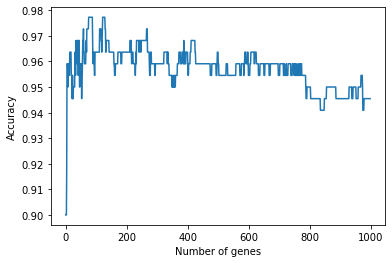

In [18]:
#Plot a graph with all accuracy scores
plt.plot(graph_RFE)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')


In [19]:
#Display the best number of features
graph_RFE = np.asarray(graph_RFE)
print(np.argmax(graph_RFE))
print(graph_RFE[np.argmax(graph_RFE)])
print(np.count_nonzero(np.where(graph_RFE == graph_RFE[np.argmax(graph_RFE)])))
print(np.where(graph_RFE == graph_RFE[np.argmax(graph_RFE)]))

#Since the counting started from 1 not zero in the for loop, 1 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 76 not 75

75
0.9772727272727273
21
(array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
       121, 122, 123, 124, 125, 126, 127, 128], dtype=int64),)


In [20]:
#The wrapper method (recursive feature elimination RFE) 76 features only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

startTime = time.time()
estimator = LinearSVC(random_state=42)
selector = RFE(estimator, n_features_to_select= 76, step=0.5)
selector = selector.fit(X_train, y_train)
endTime = time.time()
print('Time: ' + str(endTime - startTime))
# testing the model
y_pred = selector.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(selector.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(np.count_nonzero(selector.support_ == 1))


(329, 60488)
(329,)
(220, 60488)
(220,)
Time: 3.9700000286102295
0.9772727272727273
0.9772727272727273
[[195   3]
 [  2  20]]
                     precision    recall  f1-score   support

      Primary Tumor       0.99      0.98      0.99       198
Solid Tissue Normal       0.87      0.91      0.89        22

           accuracy                           0.98       220
          macro avg       0.93      0.95      0.94       220
       weighted avg       0.98      0.98      0.98       220

76


In [21]:
#Create a list with indices of RFE Features
RFE_features = np.where(selector.support_ == 1)
RFE_features = np.asarray(RFE_features)
rfe_f = []
for i in RFE_features:
  for s in i:
    rfe_f.append(s)
rfe_f = np.asarray(rfe_f)

[   68   258   529   599  1239  2011  2487  2698  3006  3443  3514  3552
  4331  4335  4517  5014  5249  5294  6433  6637  7118  7553  8003  8282
  9316  9763 10246 10628 11148 11432 11580 11820 12341 12377 12384 12394
 12568 12801 12965 14161 14642 15169 16768 19882 20443 20444 25134 25219
 25540 25967 27296 28885 30229 31884 32005 32598 33218 33379 33737 38430
 38559 39363 42765 43165 46798 47661 47688 48262 48934 50589 50729 51166
 51255 52287 52943 56890]


In [26]:
#Create list with common features among techniques
similar_all = []
similar_rfe_RF = []
similar_rfe_MI = []

count = 0
for f in it:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_rfe_MI.append(f)
print("number of similar features between RFE and MI: ", count)

count = 0
for f in important_f:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_rfe_RF.append(f)
print("number of similar features between RFE and RF: ", count)

count = 0
for f in similarity:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_all.append(f)
print("number of similar features between RF and MI: ", len(similarity))
print("number of similar features between RFE, RF and MI: ", count)


number of similar features between RFE and MI:  12
number of similar features between RFE and RF:  50
number of similar features between RF and MI:  18
number of similar features between RFE, RF and MI:  12


In [27]:
#A LinearSVC Model using the similar features between all of them
startTime = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = X_train[:, similar_all]
X_test = X_test[:, similar_all]
Y_train = y_train[:]
Y_test = y_test[:]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train[:]
Y_test = Y_test[:]
clf = LinearSVC(random_state=42)

clf.fit(X_train, Y_train)

endTime = time.time()
print('Score: ' + str(clf.score(X_test, Y_test)))
print('Time: ' + str(endTime - startTime))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Score: 0.9772727272727273
Time: 4.925028085708618
[[197   1]
 [  4  18]]
                     precision    recall  f1-score   support

      Primary Tumor       0.98      0.99      0.99       198
Solid Tissue Normal       0.95      0.82      0.88        22

           accuracy                           0.98       220
          macro avg       0.96      0.91      0.93       220
       weighted avg       0.98      0.98      0.98       220

0.9772727272727273


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
#Create a list with common features between at least two techniques
common = []
zzz = []
zzz = similar_all + similar_rfe_MI + similar_rfe_RF + similarity
for i in zzz:
  if i in common:
    pass
  else:
    common.append(i)
print ("Number of common features between at least two techniques: ",len(common))

Number of common features between at least two techniques:  56


In [30]:
#A LinearSVC Model using the common features between at least two techniques
startTime = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = X_train[:, common]
X_test = X_test[:, common]
Y_train = y_train[:]
Y_test = y_test[:]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train[:]
Y_test = Y_test[:]
clf = LinearSVC(random_state=42)

clf.fit(X_train, Y_train)

endTime = time.time()
print('Score: ' + str(clf.score(X_test, Y_test)))
print('Time: ' + str(endTime - startTime))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Score: 0.9727272727272728
Time: 4.795647621154785
[[195   3]
 [  3  19]]
                     precision    recall  f1-score   support

      Primary Tumor       0.98      0.98      0.98       198
Solid Tissue Normal       0.86      0.86      0.86        22

           accuracy                           0.97       220
          macro avg       0.92      0.92      0.92       220
       weighted avg       0.97      0.97      0.97       220

0.9727272727272728


In [31]:
#Save in a Data Frame
similar_all_names = []
for i in similar_all:
  similar_all_names.append(features_names[i])
print(similar_all_names)
df_similar_All = pd.DataFrame(similar_all_names)
df_similar_All.to_csv(r'Similar_All_Features.csv', index=False) 

['ENSG00000179133.10', 'ENSG00000224215.1', 'ENSG00000108576.8', 'ENSG00000169252.5', 'ENSG00000135604.9', 'ENSG00000204305.12', 'ENSG00000168309.15', 'ENSG00000168497.4', 'ENSG00000102760.12', 'ENSG00000163815.5', 'ENSG00000170323.7', 'ENSG00000168484.11']


In [32]:
similar_rfe_MI_names = []
for i in similar_rfe_MI:
  similar_rfe_MI_names.append(features_names[i])
print(similar_rfe_MI_names)
df_similar_rfe_MI = pd.DataFrame(similar_rfe_MI_names)
df_similar_rfe_MI.to_csv(r'Similar_RFE_MI_Features.csv', index=False) 

['ENSG00000163815.5', 'ENSG00000102760.12', 'ENSG00000170323.7', 'ENSG00000179133.10', 'ENSG00000168484.11', 'ENSG00000135604.9', 'ENSG00000169252.5', 'ENSG00000108576.8', 'ENSG00000168497.4', 'ENSG00000204305.12', 'ENSG00000224215.1', 'ENSG00000168309.15']


In [33]:
similar_rfe_RF_names = []
for i in similar_rfe_RF:
  similar_rfe_RF_names.append(features_names[i])
print(similar_rfe_RF_names)
print(len(similar_rfe_RF_names))
pd.DataFrame(similar_rfe_RF_names)
df_similar_rfe_RF = pd.DataFrame(similar_rfe_RF_names)
df_similar_rfe_RF.to_csv(r'Similar_RFE_RF_Features.csv', index=False) 

['ENSG00000179133.10', 'ENSG00000073754.5', 'ENSG00000150625.15', 'ENSG00000140600.15', 'ENSG00000224215.1', 'ENSG00000108576.8', 'ENSG00000246430.5', 'ENSG00000094963.12', 'ENSG00000169252.5', 'ENSG00000135604.9', 'ENSG00000176771.14', 'ENSG00000164736.5', 'ENSG00000204305.12', 'ENSG00000114854.6', 'ENSG00000260908.1', 'ENSG00000142748.11', 'ENSG00000259749.1', 'ENSG00000168309.15', 'ENSG00000107742.11', 'ENSG00000114812.11', 'ENSG00000168497.4', 'ENSG00000102760.12', 'ENSG00000120156.19', 'ENSG00000166292.10', 'ENSG00000132671.5', 'ENSG00000161649.11', 'ENSG00000154342.5', 'ENSG00000163815.5', 'ENSG00000104938.15', 'ENSG00000182010.9', 'ENSG00000108370.14', 'ENSG00000010319.5', 'ENSG00000131355.13', 'ENSG00000043591.5', 'ENSG00000170323.7', 'ENSG00000168539.3', 'ENSG00000101280.7', 'ENSG00000170989.8', 'ENSG00000267095.1', 'ENSG00000266120.1', 'ENSG00000244734.2', 'ENSG00000235387.1', 'ENSG00000036473.6', 'ENSG00000168484.11', 'ENSG00000188536.11', 'ENSG00000233746.1', 'ENSG000002061

In [34]:
similar_MI_RF = []
for i in similarity:
  similar_MI_RF.append(features_names[i])
print(len(similar_MI_RF))
print(similar_MI_RF)
df_similar_MI_RF = pd.DataFrame(similar_MI_RF)
df_similar_MI_RF.to_csv(r'Similar_MI_RF_Features.csv', index=False) 

18
['ENSG00000105974.10', 'ENSG00000179133.10', 'ENSG00000224215.1', 'ENSG00000108576.8', 'ENSG00000169252.5', 'ENSG00000135604.9', 'ENSG00000204305.12', 'ENSG00000186871.6', 'ENSG00000168309.15', 'ENSG00000168497.4', 'ENSG00000102760.12', 'ENSG00000131747.13', 'ENSG00000066405.11', 'ENSG00000163815.5', 'ENSG00000170323.7', 'ENSG00000234281.4', 'ENSG00000168484.11', 'ENSG00000197465.12']


In [35]:
rfe_f_names = []
for i in rfe_f:
  rfe_f_names.append(features_names[i])
print(len(rfe_f_names))
print(rfe_f_names)
df_RFE = pd.DataFrame(rfe_f_names)
df_RFE.to_csv(r'RFE_features.csv', index=False) 

76
['ENSG00000004939.12', 'ENSG00000010319.5', 'ENSG00000036473.6', 'ENSG00000043591.5', 'ENSG00000073754.5', 'ENSG00000094963.12', 'ENSG00000101280.7', 'ENSG00000102760.12', 'ENSG00000104938.15', 'ENSG00000107742.11', 'ENSG00000108370.14', 'ENSG00000108576.8', 'ENSG00000114812.11', 'ENSG00000114854.6', 'ENSG00000116016.12', 'ENSG00000120156.19', 'ENSG00000122254.6', 'ENSG00000122679.7', 'ENSG00000131355.13', 'ENSG00000132671.5', 'ENSG00000135604.9', 'ENSG00000137834.13', 'ENSG00000140600.15', 'ENSG00000142748.11', 'ENSG00000150625.15', 'ENSG00000154342.5', 'ENSG00000158578.17', 'ENSG00000161649.11', 'ENSG00000163815.5', 'ENSG00000164736.5', 'ENSG00000165312.6', 'ENSG00000166292.10', 'ENSG00000168309.15', 'ENSG00000168484.11', 'ENSG00000168497.4', 'ENSG00000168539.3', 'ENSG00000169252.5', 'ENSG00000170323.7', 'ENSG00000170989.8', 'ENSG00000176771.14', 'ENSG00000179133.10', 'ENSG00000182010.9', 'ENSG00000188536.11', 'ENSG00000204305.12', 'ENSG00000206172.7', 'ENSG00000206177.5', 'ENSG00

In [36]:
MI_f_names = []
for i in it:
  MI_f_names.append(features_names[i])
print(len(MI_f_names))
print(MI_f_names)
df_MI = pd.DataFrame(MI_f_names)
df_MI.to_csv(r'MI_features.csv', index=False) 

19
['ENSG00000163815.5', 'ENSG00000102760.12', 'ENSG00000170323.7', 'ENSG00000105974.10', 'ENSG00000179133.10', 'ENSG00000186871.6', 'ENSG00000168484.11', 'ENSG00000135604.9', 'ENSG00000234281.4', 'ENSG00000237167.1', 'ENSG00000169252.5', 'ENSG00000066405.11', 'ENSG00000131747.13', 'ENSG00000108576.8', 'ENSG00000197465.12', 'ENSG00000168497.4', 'ENSG00000204305.12', 'ENSG00000224215.1', 'ENSG00000168309.15']


In [37]:
RF_f_names = []
for i in important_f:
  RF_f_names.append(features_names[i])
print(len(RF_f_names))
print(RF_f_names)
df_RF = pd.DataFrame(RF_f_names)
df_RF.to_csv(r'RF_features.csv', index=False) 

1261
['ENSG00000183019.6', 'ENSG00000022267.15', 'ENSG00000102683.7', 'ENSG00000112782.14', 'ENSG00000164466.11', 'ENSG00000076382.15', 'ENSG00000105974.10', 'ENSG00000248243.1', 'ENSG00000179133.10', 'ENSG00000073754.5', 'ENSG00000150625.15', 'ENSG00000140600.15', 'ENSG00000224215.1', 'ENSG00000164855.14', 'ENSG00000108576.8', 'ENSG00000072163.17', 'ENSG00000246430.5', 'ENSG00000166123.12', 'ENSG00000135052.15', 'ENSG00000268505.1', 'ENSG00000251230.4', 'ENSG00000094963.12', 'ENSG00000064989.11', 'ENSG00000011426.9', 'ENSG00000169252.5', 'ENSG00000135604.9', 'ENSG00000099953.8', 'ENSG00000134917.9', 'ENSG00000213853.8', 'ENSG00000035499.11', 'ENSG00000235385.1', 'ENSG00000184661.12', 'ENSG00000183010.15', 'ENSG00000176771.14', 'ENSG00000164736.5', 'ENSG00000136160.13', 'ENSG00000114790.11', 'ENSG00000126787.11', 'ENSG00000180198.14', 'ENSG00000165304.6', 'ENSG00000120903.9', 'ENSG00000111206.11', 'ENSG00000249751.3', 'ENSG00000215595.1', 'ENSG00000180440.3', 'ENSG00000162757.4', 'ENSG

In [38]:
common_all = []
for i in common:
  common_all.append(features_names[i])
print(len(common_all))
print(common_all)
df_common = pd.DataFrame(common_all)
df_common.to_csv(r'common_all.csv', index=False) 

56
['ENSG00000179133.10', 'ENSG00000224215.1', 'ENSG00000108576.8', 'ENSG00000169252.5', 'ENSG00000135604.9', 'ENSG00000204305.12', 'ENSG00000168309.15', 'ENSG00000168497.4', 'ENSG00000102760.12', 'ENSG00000163815.5', 'ENSG00000170323.7', 'ENSG00000168484.11', 'ENSG00000073754.5', 'ENSG00000150625.15', 'ENSG00000140600.15', 'ENSG00000246430.5', 'ENSG00000094963.12', 'ENSG00000176771.14', 'ENSG00000164736.5', 'ENSG00000114854.6', 'ENSG00000260908.1', 'ENSG00000142748.11', 'ENSG00000259749.1', 'ENSG00000107742.11', 'ENSG00000114812.11', 'ENSG00000120156.19', 'ENSG00000166292.10', 'ENSG00000132671.5', 'ENSG00000161649.11', 'ENSG00000154342.5', 'ENSG00000104938.15', 'ENSG00000182010.9', 'ENSG00000108370.14', 'ENSG00000010319.5', 'ENSG00000131355.13', 'ENSG00000043591.5', 'ENSG00000168539.3', 'ENSG00000101280.7', 'ENSG00000170989.8', 'ENSG00000267095.1', 'ENSG00000266120.1', 'ENSG00000244734.2', 'ENSG00000235387.1', 'ENSG00000036473.6', 'ENSG00000188536.11', 'ENSG00000233746.1', 'ENSG000002